<div align="center"> 
<h1>Previsão de preços de casas a partir de técnicas de regressão</h1>
<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png">
</div>

# 1 - Contextualização 

Esse documento é um breve estudo para a competição *`House Prices - Advanced Regression Techniques`*, que é uma competição da plataforma `Kaggle`, que busca encontrar uma solução para prever os valores finais de imóveis, a partir de características, facilitando um orçamento para futuros clientes de imobiliárias. <br>
Uma melhor descrição para o problema abordado está disponível em [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).


# 2 - Pré-processamento

Os dados usados estão disponíveis em [house-prices-advanced-regression-techniques/data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data), e descrição detalhada dos mesmos támbem se encotram, se outros materiais forem usados serão citados posteriormente.

######
As células abaixo contêm a importação dos pacotes necessários para a leitura e manipulação dos dados, bem como a criação de visualizações. O pacote pandas é amplamente utilizado para a manipulação de dados em Python e será usado nesta análise. Além disso, os pacotes seaborn e matplotlib serão utilizados para a criação de gráficos mais sofisticados.

É possível obter mais informações sobre esses pacotes nas respectivas documentações oficiais:
- [Documentação do pandas](https://pandas.pydata.org/docs/user_guide/index.html)
- [Documentação do seaborn](https://seaborn.pydata.org/)
- [Documentação do matplotlib](https://matplotlib.org/stable/index.html)

Lembrando que todos os pacotes já estão instalados na máquina em que este documento está sendo executado. Caso ocorra algum erro, será necessário instalar os pacotes. Além disso, é importante ressaltar que a versão do Python utilizada em todo o processo é a 3.11.1. Não há garantia de que o código funcionará corretamente em versões anteriores ou posteriores.

In [137]:
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
np.int = np.int_

## 2.1 - Leitura de dados

Leitura dos dados de treinamento, esses dados serão usados para estudar a relação com a variável de interesse, para criação de modelos que tornem possível prevê-la.

In [224]:
if_kaggle = False
if if_kaggle:
    ROOT = '/kaggle/input/house-prices-advanced-regression-techniques/'
else:
    ROOT = './'
train = pd.read_csv(ROOT+'train.csv')
print("Tabela de dados de Treinamento")
display(train)

Tabela de dados de Treinamento


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## 2.2 - Análise descritiva

In [139]:
def frequencyDistribution(data, colums: list = None, type: str = 'quali', n: bool =True, bins: int = 10):
    """
    ------
    This function prints the frequency distribution of quantitative and qualitative variables in a table Variable | Frequency.
    ------
    Args:
        data: It is necessary to pass a standard pandas DataFrame of type: pandas.core.frame.DataFrame.
        colums: Inform which column you want to analyze the frequency, you can pass more than one column, however, both must be of the same type.
        type: Type of columns quantitative('quanti'), qualitative('quali').
        n: Inform whether or not the data should be normalized, the default is True.
        bins: For continuous quantitative variables you can define the amount of intervals you want to see the frequency, the default is 10.
    ------
    Returns:
        This function is of type void, it does not return anything, it just displays the frequencies.
    ------

    Examples:
        >>> frequency_distribution(dataset, colums=['column_1'],type='quanti', n=True)
    ------
    """
    for cl in colums:
        if type == 'quali':
            display(data[cl].value_counts(normalize = n).reset_index(name='Frequency').rename(columns={'index':cl}))
            #return data[cl].value_counts(normalize = n).reset_index(name='Frequency').rename(columns={'index':cl})
        elif type == 'quanti': 
            display(train[cl].value_counts(normalize = n, bins=bins).reset_index(name='Frequency').rename(columns={'index':cl}))
            #return train[cl].value_counts(normalize = n, bins=bins).reset_index(name='Frequency').rename(columns={'index':cl})
def quantiUnique(data):
    """
    ------
    This function prints the number of categories in each dataframe variable
    ------   
    Returns:
        Returns a pandas dataframe with the column name and number of categories in each
    ------
    ------
    Examples:
        >>> quantiUnique(data)
    """
    columns_name = data.columns
    datacount = pd.DataFrame(columns=['Variável','Categorias'])
    for cl in columns_name:
        newrow = pd.DataFrame({'Variável': [cl], 'Categorias': [len(data[cl].unique())]})
        datacount = pd.concat([datacount, newrow], axis=0)
    return datacount.sort_values(by='Categorias')
def qualiQualiVariablesAnalysis(varName1, varName2, ax=None):
    """
    ------
    This function will plot bivariate graphs, showing the relationship of two qualitative variables.
    ------
    Arguments:
        varName1: qualitative variable.
        varName2: qualitative variable.
        ax: if you need to make several graphics, pass your position here.
    ------
    Returns:
        This function is of type void, it does not return anything, it just plots a graph
    ------
    Examples:
        >>> qualiQualiVariablesAnalysis(varName1, varName2)
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 4))
    
    SQ_tb = pd.crosstab(index=train[varName1], columns=train[varName2], normalize="index")
    title = "Conditional Proportion: " + varName2 + " per " + varName1
    ax.set_title(title, fontsize=12)
    print("**** " + title + " ****")
    print(SQ_tb)
    stacked = SQ_tb.stack().reset_index().rename(columns={0: "Proportion"})
    sns.barplot(data=stacked, x=varName1, y="Proportion", hue=varName2, ax=ax)
    ax.set_xlabel(varName1, fontsize=12)
    ax.set_ylabel("%", fontsize=12)
    ax.legend(title=varName2)    
def qualiQuantiVariablesAnalysis(varName1, varName2, ax=None):
    """
    ------
    This function will draw bivariate graphs, showing the relationship of two variables, one quantitative and the other qualitative.
    ------
    Arguments:
        varName1: quantitative variable.
        varName2: qualitative variable.
        ax: if you need to make several graphics, pass your position here.
    ------
    Returns:
        This function plots a graph.
    ------
    Examples:
        >>> qualiQuantiVariablesAnálise(varName1, varName2)
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 4))
    title = varName1 + " per " + varName2
    ax.set_title(title, fontsize=12)

    sns.boxplot(data=train, x=varName2, y=varName1, ax=ax)
    ax.set_ylabel(varName1, fontsize=12)
    ax.set_xlabel(varName2, fontsize=12)
def moda_czuber(data):
    """
    ------
    This function returns the mode of Czuber.
    ------
    Prohibited:
        dataframe: DataFrame to which the variable belongs
    ------
    Exit:
        czuber mode
    ------
    """
    freq = {}
    for i in data:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    moda = max(freq, key=freq.get)
    freq_anterior = freq.get(moda - 1, 0)
    freq_posterior = freq.get(moda + 1, 0)

    amplitude = None
    if len(data) >= 2:
        sorted_data = sorted(data)
        amplitude = sorted_data[1] - sorted_data[0]

    if amplitude is not None:
        return moda + ((freq_posterior - freq_anterior) / (2 * freq_posterior - 2 * freq[moda])) * amplitude
    else:
        return moda

def measuresOfPositionAndDispersion(data,key):
    """
    ------
    This function returns mean, mode, and median position measurements and measures of variance, standard deviation, and amplitude dispersion.
    ------
    Returns:
        Pandas DataFrame with position, mean, mode czuber and median measurements and variance, standard deviation and range dispersion measures.
    ------
    Examples:
        >>> measuresOfPositionAndDispersion(data['column'], Name)
    """
    
    dataset = pd.DataFrame({"Variable": key ,"Amount": len(data),"Mean": [st.mean(data.dropna())], "Mode ": moda_czuber(data.dropna()), "Median": [st.median(data.dropna())], "Variance": [st.variance(data.dropna())], "Standard deviation": [st.stdev(data.dropna())], "Amplitude": [max(data.dropna()) - min(data.dropna())]})
    return dataset

### Distribuições de frequência

Obtendo os tipos de dados das colunas

In [140]:
train_types = train.dtypes 
train_types_table = train_types.reset_index()
train_types_table.columns = ['Variável', 'Tipo']
train_types_table = train_types_table.sort_values('Tipo')
display(train_types_table)


,Variável,Tipo
0,Id,int64
45,LowQualFinSF,int64
46,GrLivArea,int64
49,FullBath,int64
50,HalfBath,int64
...,...,...
13,Condition1,object
12,Neighborhood,object
53,KitchenQual,object
55,Functional,object


 Na competição nos é dado a variável de interesse *SalePrice*, ou seja, é o que devemos prever, então nessa seção iremos trabalhar sua relação com algumas outras disponíveis.
Algumas funções genéricas serão desenvolvidas que permitem a análises da variável de interesse com as demais.

Analisando distribuições de frequência para uma variável qualitativa e uma quantitativa, além de *SalePrice*, temos uma fequência maior de imoveis até 178920$

In [141]:
frequencyDistribution(train, colums=['SalePrice'],type='quanti', bins=5)

,SalePrice,Frequency
0,"(12046.788, 161231.2]",0.505995
1,"(161231.2, 309673.4]",0.421035
2,"(309673.4, 458115.6]",0.063035
3,"(458115.6, 606557.8]",0.007879
4,"(606557.8, 755000.0]",0.002055


A coluna *'1stFlrSF'*, é a coluna que representa a quantidade de metros quadrado do primeiro andar, o que é importante na avaliação do imóvel. É observado que a maior parte dos imóveis registrados tem uma aréa menor que 1205.6m².

In [142]:
frequencyDistribution(train, colums=['1stFlrSF'],type='quanti', bins=5)

,1stFlrSF,Frequency
0,"(329.238, 1286.2]",0.679000
1,"(1286.2, 2238.4]",0.309695
2,"(2238.4, 3190.6]",0.009935
3,"(3190.6, 4142.8]",0.000685
4,"(4142.8, 5095.0]",0.000685


A coluna *'RoofStyle'*, indica o tipo de telhado da construção, vemos nesse caso uma maior frequência do telhado Gable, que é muito popular por conta da sua eficiência em drenagem, e o menor custo de construção. Mais informações podem ser encontradas em [Gable Roof | Designs, Pros & Cons, Maintenance and More](https://diversifiedroofing.com/blog/gable-roof-designs-pros-cons-maintenance-and-more/).

In [143]:
frequencyDistribution(train,colums=['RoofStyle'])

,RoofStyle,Frequency
0,Gable,0.791367
1,Hip,0.188763
2,Gambrel,0.007537
3,Flat,0.006852
4,Mansard,0.003768
5,Shed,0.001713


### Gráficos Univariados

Para *'SalePrice'* e *'1stFlrSF'* podemos visualizar em dois gráficos o histograma, mostra nossa frequência de tamanhos ao longo de nossos dados, e o bloxplot nos mostra onde nossos dados estão mais distribuídos de maneira resumida, os dois gráficos são uteis para entender a distribuição de de tamanhos.

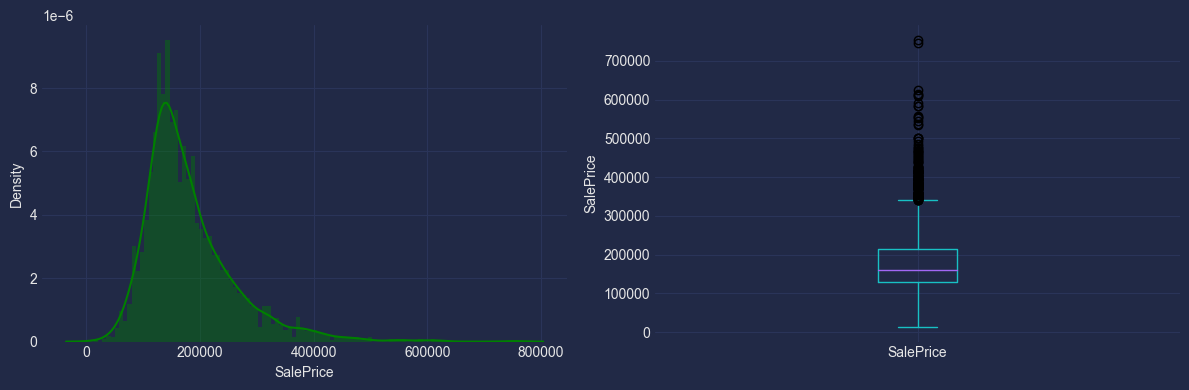

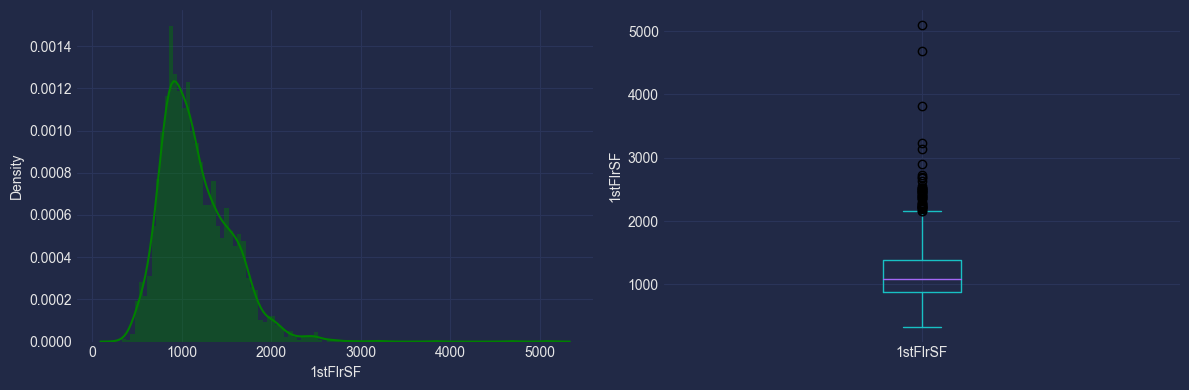

In [144]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4}, ax=axs[0])
train['SalePrice'].plot(kind='box', ax=axs[1], title='')
axs[1].set_ylabel('SalePrice')
plt.tight_layout()
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(train['1stFlrSF'], color='g', bins=100, hist_kws={'alpha': 0.4}, ax=axs[0])
train['1stFlrSF'].plot(kind='box', ax=axs[1], title='')
axs[1].set_ylabel('1stFlrSF')
plt.tight_layout()
plt.show()


Para *'RoofStyle'*, um gráfico de barras simples nos explica sem muitas dificuldades a distribuição de frequência ao longo dos nossos dados.

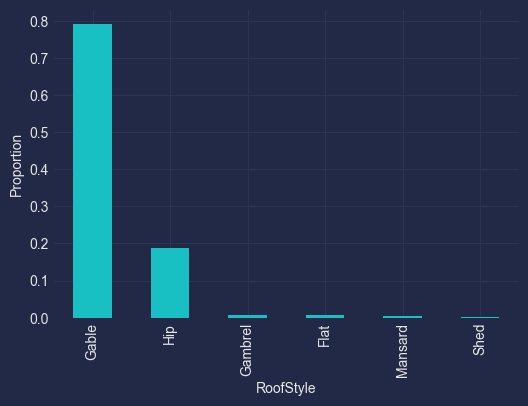

In [145]:
value_counts = train['RoofStyle'].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(6, 4))
value_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('RoofStyle')
ax.set_ylabel('Proportion')
ax.set_title('')
plt.show()

### Gráficos Bivariados

Além das análises univariadas, podemos realizar o estudo bivariado, analisando a relação entre as duas variáveis mencionadas anteriormente. 
Abaixo é mostrado um gráfico de dispersão da variável "1stFlrSF" e "SalePrice", o que nos mostra uma tendência visualmente crescente da relação, tamanho do imóvel x preço.

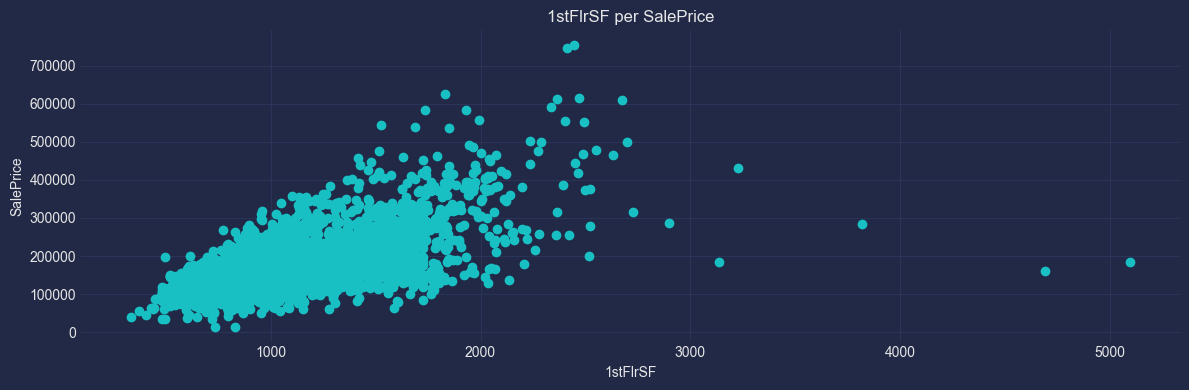

In [146]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(train['1stFlrSF'], train['SalePrice'])
ax.set_title('1stFlrSF per SalePrice')
ax.set_xlabel('1stFlrSF')
ax.set_ylabel('SalePrice')
plt.tight_layout()
plt.show()

Ao ser comparado o resumo descritivo da variável "SalePrice" e "1stFlrSF", é observado que as construções com diferentes tipos de telhado apresentam áreas mínimas distintas. Especificamente, os telhados [*"Mansard"*](https://pt.garden-landscape.com/mansard-roof-roof-truss-design-and-their-cost-7369) , [*"Shed"*](https://rasmetal.com.br/blog/cobertura-shed-e-ideal-para-galpoes/)  e [*"Flat"*](https://casaeconstrucao.org/projetos/casas-com-telhado-embutido/)são associados a construções maiores, que possuem maiores áreas mínimas e também maiores preços mínimos. As figuras abaixo mostram os gráficos de dispersão e boxplot para cada tipo de telhado, comparado com as variáveis quantitativas anteriormente citadas.<br>

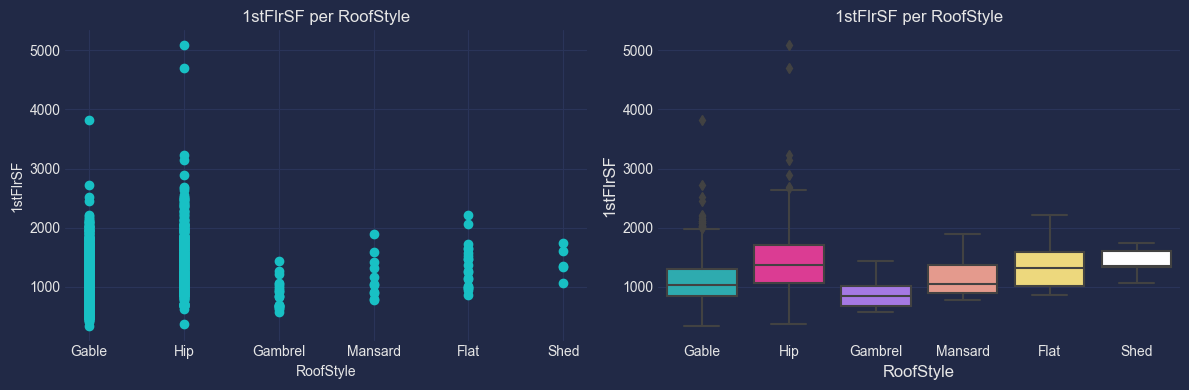

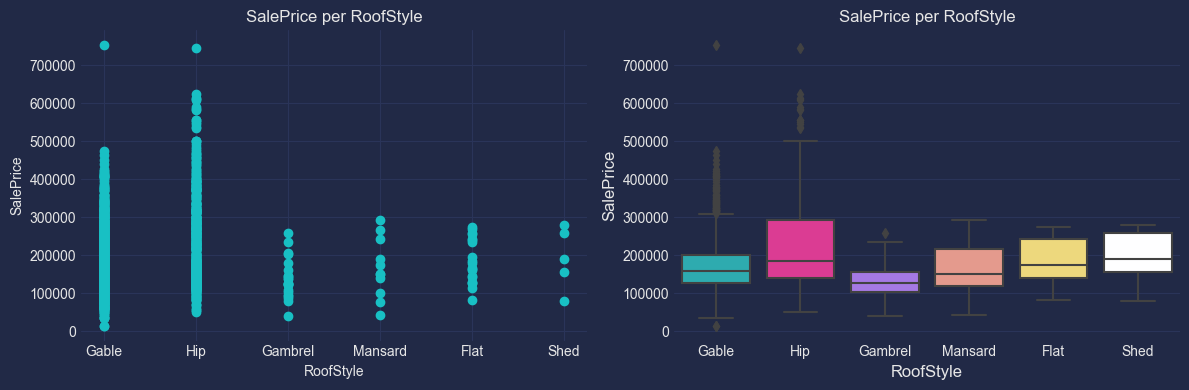

In [147]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(train['RoofStyle'], train['1stFlrSF'])
axs[0].set_title('1stFlrSF per RoofStyle')
axs[0].set_xlabel('RoofStyle')
axs[0].set_ylabel('1stFlrSF')
qualiQuantiVariablesAnalysis('1stFlrSF', 'RoofStyle', ax=axs[1])
plt.tight_layout()
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(train['RoofStyle'], train['SalePrice'])
axs[0].set_title('SalePrice per RoofStyle')
axs[0].set_xlabel('RoofStyle')
axs[0].set_ylabel('SalePrice')
qualiQuantiVariablesAnalysis('SalePrice', 'RoofStyle', ax=axs[1])
plt.tight_layout()
plt.show()

### Medidas de posição e dispersão

Vamos fazer uma breve avaliação das medidas de dispersão e posição. O que nos é mostrado graficamente é também melhor mostrado em dados, os telhados destacados anteriormente apresentam maiores tamanhos mínimos.

A célula abaixo mostras alguns dados sobre "1stFlrSF".

In [148]:
pd.DataFrame(train['1stFlrSF'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,2919.0,1159.581706,392.362079,334.0,876.0,1082.0,1387.5,5095.0


Pode-se comparar os dados da variável de origem "1stFlrSF", separando cada dado em uma categoria da variável "RoofStyle", o tipo de telhado *Gable* é o que mais se aproxima da distribuição de dados gerais, isso pode se dar por sua maior frequência no conjunto adotado.

In [149]:
display(train.groupby('RoofStyle')['1stFlrSF'].describe())

,count,mean,std,min,25%,50%,75%,max
RoofStyle,,,,,,,,
Flat,20.0,1366.200000,376.563212,862.0,1009.00,1320.0,1592.00,2217.0
Gable,2310.0,1094.446753,334.407941,334.0,854.25,1040.0,1304.75,3820.0
Gambrel,22.0,876.045455,233.334315,576.0,675.75,841.0,1009.25,1436.0
Hip,551.0,1433.863884,488.807050,372.0,1073.50,1370.0,1710.00,5095.0
Mansard,11.0,1170.363636,355.261671,780.0,905.50,1047.0,1370.00,1898.0
Shed,5.0,1423.400000,260.407949,1073.0,1332.00,1361.0,1608.00,1743.0


As análises das medidas de posição e dispersão ajudam a entender melhor o conjunto, todas as medidas são conhecidas, salvo que não está sendo usando moda comum, para dados contínuos, o mais indicado é a [Moda Czuber](https://pt.wikipedia.org/wiki/Moda_(estat%C3%ADstica)#Moda_de_Czube), que é a adotada na função **measuresOfPositionAndDispersion**.

In [150]:
display(measuresOfPositionAndDispersion(train['1stFlrSF'],'1stFlrSF'))
bivariateGroup = train.groupby('RoofStyle')['1stFlrSF']
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1stFlrSF,2919,1159.581706,863.577778,1082,153948.000776,392.362079,4761


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,Flat,20,1366.2,988.0,1320.0,141799.852632,376.563212,1355


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,Gable,2310,1094.446753,862.957143,1040.0,111828.670832,334.407941,3486


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,Gambrel,22,876.045455,672.0,841.0,54444.902597,233.334315,860


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,Hip,551,1433.863884,864.0,1370,238932.332348,488.80705,4723


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,Mansard,11,1170.363636,1047.0,1047,126210.854545,355.261671,1118


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,Shed,5,1423.4,1361.0,1361,67812.3,260.407949,670


## 2.3 Transformação de variáveis

Os dados raramente estão prontos para uso em modelos sem algum tratamento.
Esta seção aborda como tratar dados antes de usá-los em modelos.

A função abaixo retorna a porcentagem de valores faltosos, em cada coluna do dataframe alvo. É verificado que os dados de treinamento tem colunas com até 99% dos dados faltantes.

In [151]:
def tableNa(data: pd.core.frame.DataFrame):
    """
    ------
    This function returns the percentage of missing data in each column.
    ------
    ------
    Returns:
        Returns a dataframe with the columns that have missing data and their percentage
    ------
    Examples:
        >>> tablena(data)
    """
    nas = data.isna().mean().sort_values()*100
    nas_filter = nas[nas > 0]
    table = pd.DataFrame({'Variable': nas_filter.index, 'Percentage of Missing Values': nas_filter.values})
    return table

In [152]:
tableNa(train)

,Variable,Percentage of Missing Values
0,Electrical,0.034258
1,SaleType,0.034258
2,Exterior2nd,0.034258
3,BsmtFinSF1,0.034258
4,GarageCars,0.034258
5,KitchenQual,0.034258
6,GarageArea,0.034258
7,BsmtFinSF2,0.034258
8,BsmtUnfSF,0.034258
9,TotalBsmtSF,0.034258


As colunas com mais de 40% dos dados faltantes serão removidos, pois, independente do método que usado, será construído dados tendenciosos.

In [153]:
def dropColumn(data, columns=['FireplaceQu','Fence','Alley','MiscFeature','PoolQC']):
    """
    ------
    This function returns the dataframe without some columns
    ------
    Returns:
        Returns a dataframe without the indicated columns
    ------
    Examples:
        >>> dropColumn(data)
    """
    data.drop(columns, axis=1, inplace=True)
dropColumn(train)

In [154]:
tableNa(train)

,Variable,Percentage of Missing Values
0,GarageArea,0.034258
1,KitchenQual,0.034258
2,SaleType,0.034258
3,GarageCars,0.034258
4,TotalBsmtSF,0.034258
5,BsmtUnfSF,0.034258
6,Electrical,0.034258
7,BsmtFinSF1,0.034258
8,Exterior1st,0.034258
9,BsmtFinSF2,0.034258


Agora é possível realizar o preenchimento dos valores ausentes sem gerar dados excessivamente tendenciosos. Existem opções disponíveis, como a classe "SimpleImputer" do pacote sklearn. Mais informações sobre o pacote podem ser encontradas na documentação oficial [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html). No entanto, para esse caso em particular, utilizaremos funções do próprio pandas que realizam a mesma tarefa.

In [155]:
def exImputer(data: pd.core.frame.DataFrame, strategy: str = 'mean', ignore: list = None):
    """
    ------
    This function replaces missing values, in the case of numerical variables with a chosen value, in the case of objects by mode.
    ------
    ------
    Arguments:
        data: DataFrame.
        strategy: what kind of fear for quantitative variables, mean, mode or median.
        ignore: You can ignore the columns defined here.
    ------
    Returns:
        Dataframe without NaN values.
    ------
    Examples:
        >>> eximputer(data, strategy='mode', ignore = ['id']):
    """
    data_copy = data.copy()
    columns_name = data_copy.columns
    if ignore:
        columns_name = columns_name.delete(columns_name.get_indexer(ignore))
    for cl in columns_name:
        if pd.api.types.is_numeric_dtype(data_copy[cl]):
            if strategy == "mean":
                data_copy[cl] = data_copy[cl].fillna(st.mean(data_copy[cl].dropna()))
            elif strategy == "mode":
                data_copy[cl] = data_copy[cl].fillna(st.mode(data_copy[cl].dropna()))
            elif strategy == "median":
                data_copy[cl] = data_copy[cl].fillna(st.median(data_copy[cl].dropna()))     
        else:
            data_copy[cl] = data_copy[cl].fillna(st.mode(data_copy[cl].dropna()))
    return data_copy

In [156]:
train = exImputer(train)

In [157]:
tableNa(train)

,Variable,Percentage of Missing Values


### One-Hot Encoding

One-Hot Encoding, também conhecido como codificação de variáveis, permite a conversão de variáveis qualitativas em representações numéricas. Essa técnica cria colunas binárias que indicam se a variável x de uma determinada coluna y está presente ou ausente em cada linha dos dados. Existem pacotes prontos que facilitam a aplicação do One-Hot Encoding, como a classe "OneHotEncoder" do pacote [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Essa classe oferece funcionalidades específicas para realizar a codificação One-Hot Encoding de forma simples e eficiente.

In [158]:
from sklearn.preprocessing import OneHotEncoder
def oneHotEncoder(data):
    """
    ------
    This function applies an encoding to categorical data, separating by columns and indicating whether or not there is binary in the lines.
    ------
    ------
    Returns:
        Returns a pandas dataframe with new sorted columns
    ------
    Examples:
        >>> oneHotEncoder(data)
    """
    new_data = data.copy()
    onehot = OneHotEncoder()
    columns = new_data.select_dtypes(exclude=['number'])
    qualihot  = onehot.fit_transform(columns)
    quali_ohe_df = pd.DataFrame(qualihot.toarray(), columns=onehot.get_feature_names_out())
    new_data = pd.concat([new_data.select_dtypes(include=['number']), quali_ohe_df], axis=1)
    return new_data

In [159]:
df = oneHotEncoder(train)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Padronização e Logaritmo

A padronização e o logaritmo são técnicas comuns em pipelines de transformação de dados. A padronização ajusta os dados para ter média zero e variância um, o que permite comparações justas entre diferentes variáveis. O logaritmo reduz a assimetria e estabiliza a variância, sendo útil especialmente em distribuições assimétricas ou quando se lida com escalas logarítmicas.

Para realizar essas transformações, podemos utilizar a classe "StandardScaler" do pacote [sklearn.preprocessing](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para a padronização, e a função "log" do pacote numpy para o logaritmo. Essas ferramentas são eficientes e convenientes para aplicar essas técnicas em nossos dados.     
Nas células abaixo temos a aplicação da padronização nos dados de treino e o log a nossa variável alvo.

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['SalePrice','Id'], axis=1))
pd.DataFrame(scaler.transform(df.drop(['SalePrice','Id'], axis=1)), columns=df.drop(['SalePrice','Id'], axis=1).columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.067331,-0.202068,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525202,0.580907,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-0.873616,0.501870,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572250,1.178112,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.067331,-0.061280,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334828,0.097873,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.302568,-0.436714,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572250,-0.494941,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.067331,0.689587,0.518903,1.355551,-0.507284,0.947203,0.753229,1.387486,0.468931,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2.419700,-2.266952,-1.043937,-1.481920,1.289758,-0.043346,-0.682812,-0.572250,-0.969192,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,2.419700,-2.266952,-1.049263,-1.481920,-0.507284,-0.043346,-0.682812,-0.572250,-0.415899,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,-0.873616,4.256207,1.246808,-0.772552,1.289758,-0.373528,0.561757,-0.572250,1.718232,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,0.655424,-0.342855,0.034605,-0.772552,-0.507284,0.683057,0.370284,-0.572250,-0.229272,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


Aplicando o logaritmo a nossa coluna **SalePrice**

In [161]:
np.log(df['SalePrice'])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
2914    11.413105
2915    11.170435
2916    11.782953
2917    11.790557
2918    12.144197
Name: SalePrice, Length: 2919, dtype: float64

### Pipeline

A criação de pipelines facilita a definição e aplicação de transformações rápidas nos dados. Todo o processo abordado nesta seção pode ser resumido em um único comando. O uso de pipelines permite a aplicação consistente de transformações nos dados, especialmente ao lidar com conjuntos de treinamento e teste distintos.
A partir de agora, será utilizado o pacote [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), mais especificamente a classe Pipeline, tanto para os pipelines em si quanto para as transformações a serem aplicadas. Embora tenham sido apresentadas algumas funções customizadas para ilustrar as transformações de dados, é recomendável utilizar as classes e funções já estabelecidas nos pacotes, pois elas oferecem soluções mais robustas e adequadas para casos gerais.

In [162]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

Separando dados em numéricos e não numericos para facilitar criação do **pipeline**

In [163]:
quantiDf = train.drop(['SalePrice','Id'], axis=1).select_dtypes(include=['number'])
qualiDf = train.select_dtypes(exclude=['number'])

Criando pipelines para cada tipo de dado, realizaremos o preenchimento dos valores faltantes com a média para variáveis numéricas e com a moda para variáveis não numéricas. Além disso, aplicaremos a técnica de codificação One Hot Encoder para as variáveis não numéricas.

In [164]:
quantiPipeline = Pipeline([('imputer', SimpleImputer(strategy = "median", add_indicator = False)), ('std_scaler', StandardScaler())])
qualiPipeline = Pipeline([('imputer', SimpleImputer(strategy = "most_frequent", add_indicator = False)),('ohe', OneHotEncoder(sparse = False)), ('std_scaler', StandardScaler())]) 

A função "**ColumnTransformer**" combina as duas transformações em um único pipeline.

In [165]:
fullPipeline = ColumnTransformer([("quanti", quantiPipeline, quantiDf.columns), 
                                  ("quali", qualiPipeline, qualiDf.columns)]) 
fullPipeline

ColumnTransformer(transformers=[('quanti',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea',...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])

Aplicando transformação aos dados, apenas com o comando **fufullPipeline.transform()**

In [166]:
df = pd.DataFrame(fullPipeline.fit_transform(train), columns=fullPipeline.get_feature_names_out())
df.head(5)

,quanti__MSSubClass,quanti__LotFrontage,quanti__LotArea,quanti__OverallQual,quanti__OverallCond,quanti__YearBuilt,quanti__YearRemodAdd,quanti__MasVnrArea,quanti__BsmtFinSF1,quanti__BsmtFinSF2,...,quali__SaleType_ConLw,quali__SaleType_New,quali__SaleType_Oth,quali__SaleType_WD,quali__SaleCondition_Abnorml,quali__SaleCondition_AdjLand,quali__SaleCondition_Alloca,quali__SaleCondition_Family,quali__SaleCondition_Normal,quali__SaleCondition_Partial
0,0.067331,-0.202068,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525202,0.580907,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-0.873616,0.501870,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572250,1.178112,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.067331,-0.061280,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334828,0.097873,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.302568,-0.436714,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572250,-0.494941,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.067331,0.689587,0.518903,1.355551,-0.507284,0.947203,0.753229,1.387486,0.468931,-0.29313,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


### 2.4. Partição dos dados de treinamento entre treino e validação

Sempre é necessário validar os modelos com dados desconhecidos. Uma abordagem interessante é separar uma parte dos dados do conjunto de treino para essa validação. A classe "train_test_split" do pacote [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), facilita esse trabalho.

Na célula abaixo, é realizada uma seleção aleatória de 5% dos dados de treinamento para serem utilizados na etapa de validação.

In [167]:
from sklearn.model_selection import train_test_split
df['SalePrice'] = train['SalePrice']
df, test = train_test_split(df, test_size = 0.05, random_state = 123)
saleprice = df['SalePrice']
df['SalePrice'], test['SalePrice'] = np.log(df['SalePrice']), np.log(test['SalePrice'])
test

,quanti__MSSubClass,quanti__LotFrontage,quanti__LotArea,quanti__OverallQual,quanti__OverallCond,quanti__YearBuilt,quanti__YearRemodAdd,quanti__MasVnrArea,quanti__BsmtFinSF1,quanti__BsmtFinSF2,...,quali__SaleType_New,quali__SaleType_Oth,quali__SaleType_WD,quali__SaleCondition_Abnorml,quali__SaleCondition_AdjLand,quali__SaleCondition_Alloca,quali__SaleCondition_Family,quali__SaleCondition_Normal,quali__SaleCondition_Partial,SalePrice
1156,0.537805,0.736516,-0.103747,-0.772552,2.188279,-0.208437,0.705361,-0.572250,0.420627,-0.293130,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,12.100156
15,-0.285524,-0.859076,-0.513352,0.646183,2.188279,-1.397095,0.801097,-0.572250,-0.969192,-0.293130,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,11.790557
641,0.067331,0.000000,-0.395416,0.646183,-0.507284,0.980221,0.801097,-0.572250,0.651166,-0.293130,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,12.328290
299,-0.873616,0.501870,0.485932,-0.063185,2.188279,-0.703711,0.944701,-0.572250,-0.969192,-0.293130,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,7.902944,-2.155466,-0.302693,11.973510
1414,-0.167905,-0.248997,0.365840,-0.063185,1.289758,-1.595205,0.753229,-0.572250,-0.969192,-0.293130,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,12.240474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,-0.873616,0.501870,-0.065703,-0.063185,-0.507284,0.187782,-0.347736,1.443478,0.536995,-0.293130,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,12.031124
1275,0.773042,1.205808,0.149244,-0.772552,-0.507284,-0.769748,-1.640173,2.602522,-0.486159,-0.293130,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,11.827736
1599,1.478753,-1.609944,-0.793989,1.355551,-0.507284,0.584002,0.226680,-0.572250,-0.802326,-0.293130,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,11.998433
616,0.067331,0.000000,-0.292571,-0.063185,-0.507284,1.013239,0.896833,-0.572250,0.034200,-0.293130,...,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,12.118334


# 3 - Modelagem

Conforme mencionado no problema, trata-se de um problema adequado para técnicas de regressão. Nesta seção são apresentados alguns modelos e soluções para abordar o problema em questão.

In [168]:
test_regre = test.copy() #cópia dos dados de teste
test_regre.drop(['SalePrice'], axis=1, inplace=True)

## 3.1 - Modelos manualmente definidos

### Linear Regression

A regressão linear é um dos métodos mais simples de regressão, sendo uma solução adequada para problemas em que desejamos prever uma variável com base em outras variáveis explicativas. Ela estabelece uma relação linear entre as variáveis, permitindo a criação de um modelo que representa essa relação.

Para uma compreensão mais aprofundada da regressão linear, recomenda-se consultar o livro "Linear Regression" que pode ser encontrado em [Linear Regression - Google Livros](https://books.google.com.br/books?id=IvAw_1MTASsC&lpg=PA3&ots=GtlI5ndwpz&dq=regression%20linear&lr&hl=pt-BR&pg=PA33#v=onepage&q=regression%20linear&f=false). Ele oferece uma explicação mais detalhada sobre a regressão linear e seus conceitos fundamentais.

A célula abaixo define os dados de treino dos modelos

In [169]:
x_train = df.drop(['SalePrice'], axis=1)
y_train = df['SalePrice']

É necessário verificar correlação entre as variáveis e a variável `SalePrice` e selecionar aquelas com uma correlação maior ou igual a um valor determinado. Isso ajudará a identificar as variáveis mais relevantes para prever o preço de venda.   
Abaixo é gerado uma tabela com todas as correlações.

In [170]:
corr_bay = x_train.corrwith(y_train)
corr_bay

quanti__MSSubClass             -0.070886
quanti__LotFrontage             0.326633
quanti__LotArea                 0.269287
quanti__OverallQual             0.826705
quanti__OverallCond            -0.044851
                                  ...   
quali__SaleCondition_AdjLand   -0.071218
quali__SaleCondition_Alloca    -0.028268
quali__SaleCondition_Family    -0.031527
quali__SaleCondition_Normal    -0.096086
quali__SaleCondition_Partial    0.328745
Length: 270, dtype: float64

Filtrando as colunas com uma correlação > |0.4|.

In [171]:
corr_var = corr_bay[abs(corr_bay) > 0.4].index.tolist()

O modelo será criado com a fórmula `'SalePrice ~ ' + ' + '.join(corr_var)`, em que `corr_var` é a lista das variáveis que possuem uma correlação maior ou igual a |0.4|. Essa fórmula representa a relação entre a variável "SalePrice" e as variáveis selecionadas.
A biblioteca "[statsmodels.formula.api](https://www.statsmodels.org/stable/api.html)" facilita o uso de fórmulas matemáticas como parte dos pacotes de modelagem. 

In [172]:
import statsmodels.formula.api as smf
reg_model = smf.ols('SalePrice ~ ' + ' + '.join(corr_var), data=df).fit()
print('SalePrice ~ ' + ' + '.join(corr_var))

SalePrice ~ quanti__OverallQual + quanti__YearBuilt + quanti__YearRemodAdd + quanti__MasVnrArea + quanti__BsmtFinSF1 + quanti__TotalBsmtSF + quanti__1stFlrSF + quanti__GrLivArea + quanti__FullBath + quanti__TotRmsAbvGrd + quanti__Fireplaces + quanti__GarageYrBlt + quanti__GarageCars + quanti__GarageArea + quali__MasVnrType_None + quali__ExterQual_Gd + quali__ExterQual_TA + quali__Foundation_PConc + quali__BsmtQual_Ex + quali__BsmtQual_TA + quali__BsmtFinType1_GLQ + quali__HeatingQC_Ex + quali__KitchenQual_Ex + quali__KitchenQual_TA + quali__GarageFinish_Fin + quali__GarageFinish_Unf


### Logistic Regression

Além da regressão linear, a segunda técnica mais popular é a regressão logística, que é utilizada para fins de classificação. Geralmente, a regressão logística é aplicada em problemas de classificação binária, mas também pode ser utilizada para a classificação de múltiplas classes, conforme descrito em [Classificação Logística Multiclasse](https://learn.microsoft.com/pt-pt/azure/machine-learning/component-reference/multiclass-logistic-regression?view=azureml-api-2).
Considerando que temos uma faixa de preço para os imóveis e características semelhantes entre eles, podemos utilizar a regressão logística para classificar cada um dos imóveis em uma determinada faixa de preço. No entanto, é importante ressaltar que a regressão logística não é a técnica mais indicada para esse tipo de serviço, uma vez que seu uso mais comum está associado à classificação em problemas binários.

In [173]:
# Não funciona para dados aplicados o log
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(df.drop(['SalePrice'], axis=1), saleprice)

LogisticRegression()

In [174]:
y_pred_log = log_reg.predict(test_regre)

In [175]:
logistic_df = pd.DataFrame({'SalePrice': np.exp(test['SalePrice']), 'logistic reg prediction': y_pred_log})
logistic_df.head(10)

,SalePrice,logistic reg prediction
1156,179900.0,132000
15,132000.0,112500
641,226000.0,270000
299,158500.0,145000
1414,207000.0,145000
709,109900.0,139000
1523,135000.0,105000
2871,35000.0,87000
2369,176500.0,172900
2529,117000.0,145000


### XGBoost - Regressor

Uma ferramenta disponível para o aprendizado de máquina é o XGBoost, um pacote baseado em árvores de decisão em conjunto que utiliza uma estrutura de reforço de gradiente. O XGBoost é amplamente utilizado em competições de ciência de dados e é conhecido por sua eficiência e capacidade de lidar com conjuntos de dados complexos [[1]](https://cienciaenegocios.com/tendencias-de-pacotes-para-a-linguagem-r-na-area-de-ciencia-de-dados-para-2023/).   
Para obter mais informações sobre o XGBoost, recomenda-se consultar a documentação oficial disponível em [xgboost](https://xgboost.readthedocs.io/en/stable/).

Os argumentos fornecidos são:

- `objective`: Indica o tipo de modelo de previsão que o XGBoost irá utilizar. No caso apresentado, o valor é "reg:linear", o que indica que o objetivo é realizar uma regressão linear.

- `n_estimators`: Esse argumento define o número de estimadores que serão construídos no modelo XGBoost. No exemplo, o valor é 20, o que significa que serão criados 20 estimadores.

- `seed`: Esse argumento define a semente (seed) do gerador de números aleatórios. O uso de uma semente permite que os resultados do modelo sejam reproduzíveis, ou seja, ao fornecer o mesmo valor de semente, é possível obter os mesmos resultados em diferentes execuções. No exemplo, o valor da semente é 123.

In [214]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 20, seed=123)

xgb_r.fit(df.drop(['SalePrice'], axis=1), df['SalePrice'])

pred_xgb = xgb_r.predict(test_regre)

[13:27:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [177]:
xgbost_df = pd.DataFrame({'SalePrice': test['SalePrice'], 'xgbost reg prediction': pred_xgb})
xgbost_df.head(10)

,SalePrice,xgbost reg prediction
1156,12.100156,11.994353
15,11.790557,11.920319
641,12.328290,12.318881
299,11.973510,11.976912
1414,12.240474,12.072891
709,11.607326,11.638901
1523,11.813030,11.713518
2871,10.463103,10.946463
2369,12.081076,12.045493
2529,11.669929,11.626675


### Decision Tree

Uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas. Permite que um indivíduo ou organização compare possíveis ações com base em seus custos, probabilidades e benefícios. Podem pode ser usadas tanto para conduzir diálogos informais quanto para mapear um algoritmo que prevê a melhor escolha, matematicamente [[2]](https://www.lucidchart.com/pages/pt/o-que-e-arvore-de-decisao).    
Ela é uma representação de uma tabela de decisão sob a forma de árvore. A árvore de decisão é um importante algoritmo de ML para dominar, devido à sua versatilidade. Ela permite que um indivíduo ou organização compare possíveis resultados de uma série de escolhas relacionadas.

Os argumentos fornecidos são: 
- `random_state=`  : Esse argumento define a semente do gerador de números aleatórios, possibilita que nossos resultados sejam reproduzíveis, assim como o argumento `seed=` do XGBoost. 
- `min_samples_split =` :  Define o número mínimo de dados para que um nó seja dividido em nossa árvore.

In [178]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
tree_reg = DecisionTreeRegressor(random_state = 0, min_samples_split = 10) 
tree_reg.fit(x_train, y_train)
y_train_predictions = [round(y_hat) for y_hat in tree_reg.predict(test_regre)]

###  Random Forest

As Árvores de Decisão, ou Decision Trees, estabelecem regras para tomada de decisão. O algoritmo criará uma estrutura similar a um fluxograma, com “nós” onde uma condição é verificada, e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, até a finalização da árvore [[3]](https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/).

Os argumentos abaixo são análogos à árvore de decisão.

In [179]:
from sklearn.ensemble import RandomForestRegressor 
forest_reg = RandomForestRegressor(random_state=0, min_samples_split = 10) 
forest_reg.fit(x_train, y_train.values.ravel())
y_train_predictions = [round(y_hat) for y_hat in forest_reg.predict(test_regre)]

### Support Vector Regression - SVR

O SVR é semelhante à regressão linear, mas consegue lidar com dados não lineares ao tentar encontrar a melhor curva para ajustar os dados[[4]](https://sol.sbc.org.br/index.php/eniac/article/view/9355). Nesse caso a abordagem será um kernel linear.

Os argumentos fornecidos são:
- `kernel=`  : Define o tipo de kernel a ser usado no modelo de regressão vetorial de suporte (Support Vector Regression - SVR).
- `C=` : Define a regularização do modelo SVR, controlando a penalidade por erros de treinamento e influenciando a flexibilidade do modelo.
- `epsilon=` : Controla a margem de tolerância do modelo.

In [180]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_reg.fit(x_train, y_train)
y_train_svr = [round(y_hat) for y_hat in svr_reg.predict(test_regre)]

### Artificial Neural Network - ANN

Uma rede neural artificial (ANN) é um modelo computacional inspirado pela estrutura neural de organismos inteligentes e que adquirem conhecimento através da experiência. As redes neurais artificiais são capazes de aprender e modelar não-linearidades e relações complexas [[5]](https://en.wikipedia.org/wiki/Artificial_neural_network).

Os argumentos fornecidos são:
- `random_state=`  : Esse argumento é análogo ao das árvores de decisão.
- `hidden_layer_sizes=` : Especifica a arquitetura da rede neural e a quantidade de neurônios em cada camada.
- `activation=` : Define a função de ativação usada nos neurônios da rede.
- `max_iter=` : Define o número máximo de iterações ou épocas durante o treinamento da rede neural.

In [181]:
#https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e
from sklearn.neural_network import MLPRegressor
ann_reg = MLPRegressor(random_state=0, hidden_layer_sizes=(100, 50, 30, 20, 10, 5), 
                       activation="relu", max_iter=2000)
ann_reg.fit(x_train, saleprice)
y_train_ann = [round(y_hat) for y_hat in ann_reg.predict(test_regre)]

## 3.2. Modelos otimamente definidos

É possível encontrar manualmente os melhores parâmetros para o modelo, mas essa abordagem demandaria muito tempo. Uma alternativa é utilizar pacotes como [GridSearchCV](https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) e [BayesSearchCV](https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html). Esses pacotes permitem que o software selecione automaticamente a melhor combinação de parâmetros para os modelos, atuando de formas diferentes nas buscas.

- `GridSearchCV`: Essa técnica irá testar todas as combinações possíveis dos hiperparâmetros, exaustivamente. Basicamente, irá fornecer alguns valores de input e testar todas as combinações plotando em um plano cartesiano (por isso o nome de grid). Em seguida, selecionará os hiperparâmetros que obtiveram o menor erro [[6]](https://medium.com/data-hackers/otimizando-os-hiperpar%C3%A2metros-621de5e9be37).

- `RandomizedSearchCV`: Essa técnica acaba suprindo o problema com muitas combinações. Isso se deve ao fato de testar combinações aleatórias e os melhores resultados funciona como um guia para a escolha dos próximos hiperparâmetros. Contudo, percebemos claramente que isso poderá levar em sua maioria, para o mínimo local e não para o mínimo global [[6]](https://medium.com/data-hackers/otimizando-os-hiperpar%C3%A2metros-621de5e9be37).

- `BayesSearchCV`: É uma técnica tenta estimar qual é a combinação de hiperparâmetros que resultará na maior performance, com base numa distribuição criada a partir das combinações testadas anteriormente [[7]](https://medium.com/turing-talks/modelos-de-predi%C3%A7%C3%A3o-otimiza%C3%A7%C3%A3o-de-hiperpar%C3%A2metros-em-python-3436fc55016e).

Esses pacotes são úteis quando temos um conjunto grande de hiperparâmetros e queremos encontrar a melhor combinação sem ter que testar manualmente todas as opções. Eles automatizam o processo de busca e ajudam a encontrar os melhores hiperparâmetros de forma mais eficiente.

As seções a seguir fornecerão uma visão geral das buscas por hiperparâmetros usando as ferramentas mencionadas anteriormente. Cada pacote opera de maneira diferente, com suas próprias particularidades.   
Cada ferramenta recebem uma lista de paramentos para buscar a melhor combinação limites mínimos e máximos desejados, esses mesmos já foram comentados na seção `Modelos Individuais`, algumas funções operam de maneiras mais complexas, portanto, é recomendado consultar as documentações individuais para obter informações mais detalhadas sobre o funcionamento de cada uma delas.

A função `getOptimalModelViaBayesSearchCv()` usa a otimização bayesiana para encontrar os hiperparâmetros ideais para um determinado modelo de aprendizado de máquina. Ele recebe como entrada o objeto modelo, um dicionário de distribuições de parâmetros, dados de treinamento e outros parâmetros opcionais, como número de épocas, tamanho do lote e divisão de validação.    
O plot gerado por `plot_objective()` ajuda a visualizar o processo de otimização e o espaço de busca dos hiperparâmetros. Pode ser usado para identificar regiões do espaço de busca que não foram exploradas e para obter insights sobre a relação entre os hiperparâmetros e a função objetivo [[8]](https://scikit-optimize.github.io/stable/auto_examples/plots/visualizing-results.html).

In [182]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# probabilistic optimization via BayesSearchCV
#https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f
# !pip install scikit-optimize
from skopt.plots import plot_objective
from skopt.space import Real, Categorical, Integer
def getOptimalModelViaBayesSearchCv(modelObj, parsDists, x_train, y_train, verbose=False, 
                                    epochs=150, batch_size=32,validation_split=.2, callbacks=[]):
    # log-uniform: understand as search over p = exp(x) by varying x
    opt = BayesSearchCV(modelObj, parsDists, n_iter=32,  cv=3, return_train_score = True, 
                        scoring = 'neg_mean_squared_error', verbose=verbose, n_jobs = 3)
    if(type(modelObj).__name__!='KerasRegressor'):
        opt.fit(X = x_train, y = y_train.values.ravel())
    else:
        opt.fit(X = x_train, y = y_train, #.values.ravel(), 
                epochs=epochs, batch_size=batch_size,
                validation_split=validation_split, callbacks = callbacks)
    parNames = [name for name, value in parsDists.items()]
    _ = plot_objective(opt.optimizer_results_[0],
                    dimensions=parNames,
                    n_minimum_search=int(1e8))
    plt.show()
    print('best_params = ', opt.best_params_)
    print('best_score (RMSE)= ', np.sqrt(-opt.best_score_))
    model = opt.best_estimator_
    return (model)


### Decision Tree via BayesSearchCV

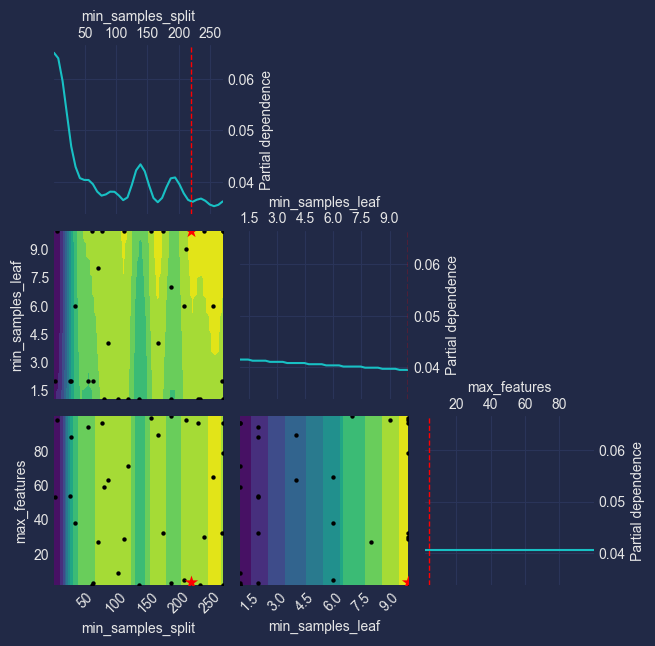

best_params =  OrderedDict([('max_features', 220), ('min_samples_leaf', 10), ('min_samples_split', 4)])
best_score (RMSE)=  0.18381379369618028


In [183]:
parsDists = {
             'min_samples_split': (2, 100),
             'min_samples_leaf': (1, 10),
             'max_features': (1, x_train.shape[1])
             }
tree_reg2 = getOptimalModelViaBayesSearchCv(DecisionTreeRegressor(random_state=0),
                                            parsDists, x_train, y_train)


### Random Forest Hyperparameters dictionary

In [184]:
randomForestParamsSearch = {'n_estimators': [40, 50, 100], # Number of trees in the forest.
                            'max_depth': [None, 5, x_train.shape[1]],  # Maximum depth of each tree in the forest.
                            'max_features': [6, 8, x_train.shape[1]], # Maximum number of features to consider in each node split.
                            'min_samples_split': [2, 10, 12]} # Minimum number of samples needed to perform a split on a node.

### Random Forest via GridSearchCV

In [185]:
forest_reg2 = RandomForestRegressor(random_state=0, bootstrap= False) 
grid_search = GridSearchCV(forest_reg2, randomForestParamsSearch, cv = 3, scoring = 'neg_mean_squared_error', 
                           return_train_score = True, verbose=True) 
grid_search.fit(x_train, y_train.values.ravel())
forest_reg2 = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


### Random Forest via RandomizedSearchCV

In [186]:
forest_reg3 = RandomForestRegressor(random_state=0, bootstrap=False)
random_search = RandomizedSearchCV(forest_reg2, param_distributions=randomForestParamsSearch, n_iter=10, cv=3, scoring='neg_mean_squared_error', return_train_score=True, verbose=True)
random_search.fit(x_train, y_train.values.ravel())
forest_reg3 = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


### Random Forest via BayesSearchCV

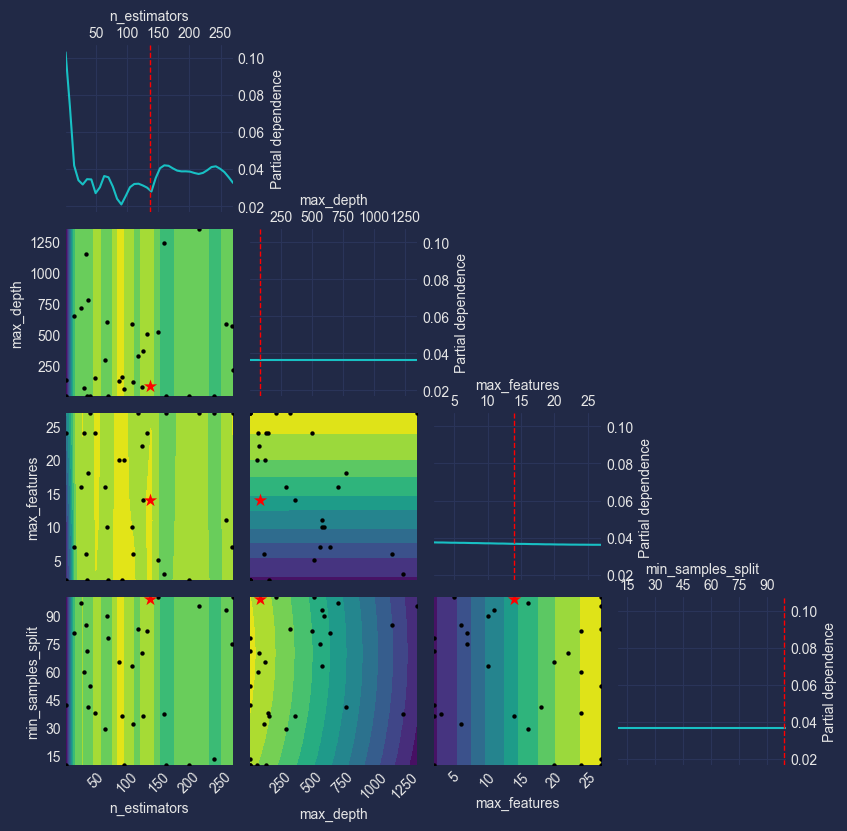

best_params =  OrderedDict([('max_depth', 136), ('max_features', 85), ('min_samples_split', 14), ('n_estimators', 99)])
best_score (RMSE)=  0.13678293361049595


In [187]:
forest_reg4 = RandomForestRegressor(random_state=0, bootstrap=False) 
parsDists = {'n_estimators': Integer(10, 100, 'uniform'), 
             'max_depth': Integer(1, x_train.shape[1], 'uniform'), 
              'max_features': Integer(1, 5*x_train.shape[1], 'uniform'), 
              'min_samples_split': Integer(2, int(.01*len(x_train)), 'uniform')}
forest_reg4 = getOptimalModelViaBayesSearchCv(forest_reg3, parsDists, x_train, y_train)

### XGBoost Hyperparameters dictionary

In [188]:
param_search = {"max_depth":    [4, 5, 6],  # maximum tree depth.
              "n_estimators": [100, 300, 500, 700], # number of estimators.
              "learning_rate": [0.01, 0.015]} # learning rate.

### XGBoost via GridSearchCV

In [189]:
xg_grid=xg.XGBRegressor(eval_metric='rmse')
search = GridSearchCV(xg_grid, param_search, cv=5).fit(df.drop(['SalePrice'], axis=1), df['SalePrice'])
xg_grid=xg.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')
xg_grid.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### XGBoost via RandomizedSearchCV

In [190]:
xg_random = xg.XGBRegressor(eval_metric='rmse')
param_search = {"max_depth":    [4, 5, 6],  # maximum tree depth.
              "n_estimators": [100, 300, 500, 700], # number of estimators.
              "learning_rate": [0.01, 0.015]} # learning rate.
random_search = RandomizedSearchCV(xg_random, param_distributions=param_search, n_iter=10, cv=5, random_state=0)
random_search.fit(df.drop(['SalePrice'], axis=1), df['SalePrice'])
xg_random = random_search.best_estimator_

### XGBoost via BayesSearchCV

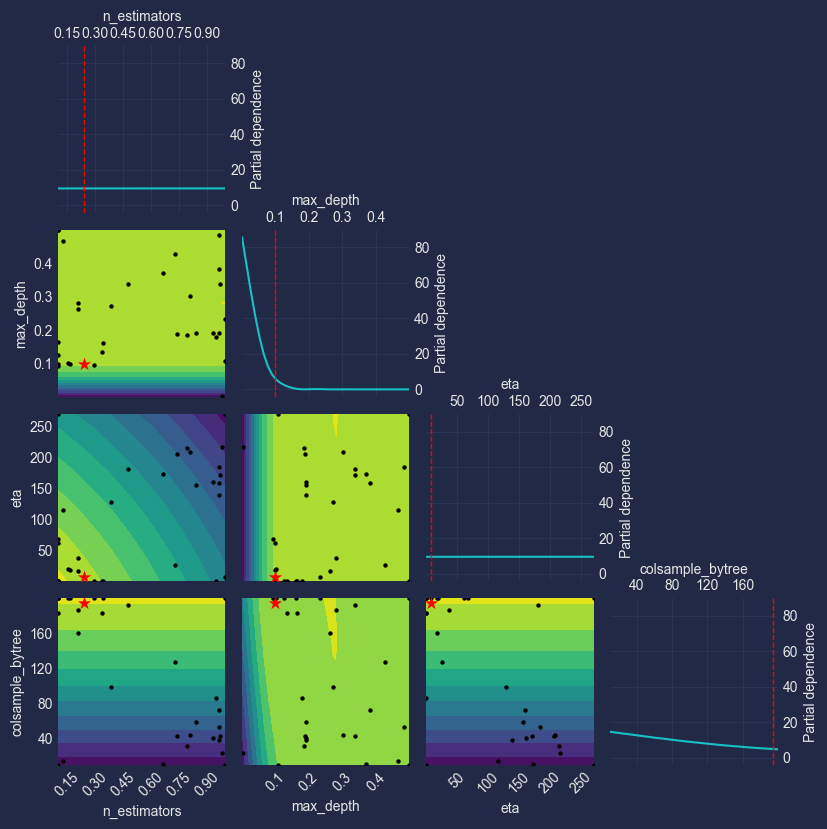

best_params =  OrderedDict([('colsample_bytree', 0.24130918892598413), ('eta', 0.09862857251975786), ('max_depth', 8), ('n_estimators', 194)])
best_score (RMSE)=  0.13017973234808913


In [191]:
import xgboost as xg
xg_bay = getOptimalModelViaBayesSearchCv(modelObj=xg.XGBRegressor(),
                                        parsDists={
                                            'n_estimators': Integer(10, 200, 'uniform'), 
                                            'max_depth': Integer(1, x_train.shape[1], 'uniform'), 
                                            'eta': Real(.001, .5, 'uniform'), 
                                            'colsample_bytree': Real(.1, 1, 'uniform')}, 
                                            x_train=x_train, y_train=y_train)

## 3.3. Medidas de desempenho

É sempre necessário analisar o desempenho dos modelos criados, tando os definidos manualmente como otimamente definidos, vamos usar métricas de erros: R2, MAE, RMSE, RMSLE.
- `R2 (R-quadrado)` : mede o quão bem a linha de regressão ajusta os pontos de dados. Varia de 0 a 1, com 1 indicando um ajuste perfeito e 0 indicando nenhum ajuste.
- `MAE (Mean Absolute Error)`: mede a diferença média absoluta entre os valores previstos e os valores reais. É menos sensível a outliers do que o RMSE.
- `RMSE (Root Mean Squared Error)`: mede a raiz quadrada da média das diferenças quadradas entre os valores previstos e os valores reais. É mais sensível a outliers do que o MAE.
- `RMSLE (Root Mean Squared Logarithmic Error)`: mede a raiz quadrada da média das diferenças quadradas entre o logaritmo dos valores previstos e o logaritmo dos valores reais. Geralmente é usado quando a variável de destino possui uma ampla faixa de valores.   
Pode-se encontrar mais dados sobre os erros e as funções usadas na documentação oficial: [regression-metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

A função abaixo recebe um dicionário com o nome e cada modelo, gerar as previsões e retorna um dataframe com as métricas ordenadas pelo 'RSME', que é a métrica adotada na competição.

In [192]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

def printPerformanceMeasures(models):
    """
    ------
    This function takes a dictionary of models and returns data about errors.
    ------
    ------
    Arguments:
        models: Dictionary of models with their names as keys.
    ------
    Returns:
        Displays data on errors: R2, MAE, RMSE, RMSLE.
        Returns a DataFrame containing the performance measures sorted by RMSE.
    ------
    Examples:
        >>> printPerformanceMeasures(models_dict)
    """
    y_true = np.exp(test['SalePrice'])
    tableModels = pd.DataFrame(columns=['Model','R2', 'MAE', 'RMSE', 'RMSLE'])
    for name, model in models.items():
        y_pred = model.predict(test_regre)
        y_true_log = np.log1p(y_true)
        y_pred_log = np.log1p(y_pred)
        if not (name == 'ANN' or name == 'Logistic Regression'):
            y_pred = np.exp(y_pred)
        line = pd.Series([name, r2_score(y_true, y_pred),
                          mean_absolute_error(y_true, y_pred),
                          np.sqrt(mean_squared_error(y_true, y_pred)),
                          np.sqrt(mean_squared_log_error(y_true, y_pred_log))],
                         index=tableModels.columns)
        tableModels = tableModels.append(line, ignore_index=True)
    tableModels = tableModels.sort_values(by='RMSE', ascending=True)
    display(tableModels)
    return tableModels

In [193]:
single_models = [reg_model,log_reg, svr_reg, ann_reg, tree_reg, tree_reg2, forest_reg, forest_reg2, forest_reg3, forest_reg4, xgb_r, xg_grid,xg_random, xg_bay]
model_names = ['Linear Regression','Logistic Regression', 'SVR', 'ANN', 'Decision Tree', 'Decision Tree Bayesian Optimization', 'Random Forest', 'Random Forest Grid Search', 'Random Forest Random Search', 'Random Forest Bayesian Optimization', 'XGBoost Regression', 'XGBoost Grid Search', 'XGBoost Random Search', 'XGBoost Bayesian Optimization']
model_dict = {name: model for name, model in zip(model_names, single_models)}
tableModels = printPerformanceMeasures(model_dict)

,Model,R2,MAE,RMSE,RMSLE
12,XGBoost Random Search,0.920503,13522.837034,21440.433404,10.772795
2,SVR,0.920280,13847.700046,21470.577809,10.772891
9,Random Forest Bayesian Optimization,0.919602,13485.405855,21561.577064,10.772789
11,XGBoost Grid Search,0.916972,13827.826600,21911.425847,10.772825
6,Random Forest,0.913287,13952.118015,22392.453517,10.772818
13,XGBoost Bayesian Optimization,0.906653,13815.788822,23233.238853,10.772754
7,Random Forest Grid Search,0.905989,15214.969482,23315.624900,10.773000
8,Random Forest Random Search,0.899292,16088.045951,24131.918637,10.773001
10,XGBoost Regression,0.898992,16274.377194,24167.823861,10.773112
0,Linear Regression,0.895092,17717.548437,24629.932738,10.772785


 # 4. Submissão à competição do Kaggle

Por ser uma competição do disponível na plataforma Kaggle, temos dados de teste para gerarmos previsões e submetermos, analisaremos as mesmas variáveis da seção 2, agora nos dados de testes.

In [194]:
test_kaggle = pd.read_csv(ROOT+'test.csv')

In [195]:
#test_kaggle = test_kaggle[list(train.drop('SalePrice', axis=1).columns)] #tratamento para dadasets diferentes

## 4.1 - Análise descritiva

### Distribuições de frequência

A variável `SalePrice` não está disponível nos dados de teste, porém, ainda é possível analisar as demais. As tabelas abaixo frequências para as variáveis `1stFlrSF` e `RoofStyle`, nos dados de teste e treino, e a diferença entre as frequências.

As frequências de `1stFlrSF` são iguais para 5 subdivisões, em ambos os datasets.

In [196]:
print('Dados de Treino: ')
frequencyDistribution(train, colums=['1stFlrSF'],type='quanti', bins=5)
print('Dados de Teste: ')
frequencyDistribution(test_kaggle, colums=['1stFlrSF'],type='quanti', bins=5)

Dados de Treino: 


,1stFlrSF,Frequency
0,"(329.238, 1286.2]",0.679000
1,"(1286.2, 2238.4]",0.309695
2,"(2238.4, 3190.6]",0.009935
3,"(3190.6, 4142.8]",0.000685
4,"(4142.8, 5095.0]",0.000685


Dados de Teste: 


,1stFlrSF,Frequency
0,"(329.238, 1286.2]",0.679000
1,"(1286.2, 2238.4]",0.309695
2,"(2238.4, 3190.6]",0.009935
3,"(3190.6, 4142.8]",0.000685
4,"(4142.8, 5095.0]",0.000685


As frequências de 'RoofStyle' não são iguais como as da variável anterior, porém, também são bastante próximas, em ambos os datasets.

In [197]:
print('Dados de Treino: ')
frequencyDistribution(train,colums=['RoofStyle'])
print('Dados de Teste: ')
frequencyDistribution(test_kaggle,colums=['RoofStyle'])

Dados de Treino: 


,RoofStyle,Frequency
0,Gable,0.791367
1,Hip,0.188763
2,Gambrel,0.007537
3,Flat,0.006852
4,Mansard,0.003768
5,Shed,0.001713


Dados de Teste: 


,RoofStyle,Frequency
0,Gable,0.801234
1,Hip,0.181631
2,Gambrel,0.007539
3,Flat,0.004798
4,Mansard,0.002742
5,Shed,0.002056


### Gráficos Univariados

A relação mostrada anteriormente, ficará mais evidente nos gráficos abaixo, mostrando que os dados não são idênticos, porém, bem semelhantes.

Dados de Treino:


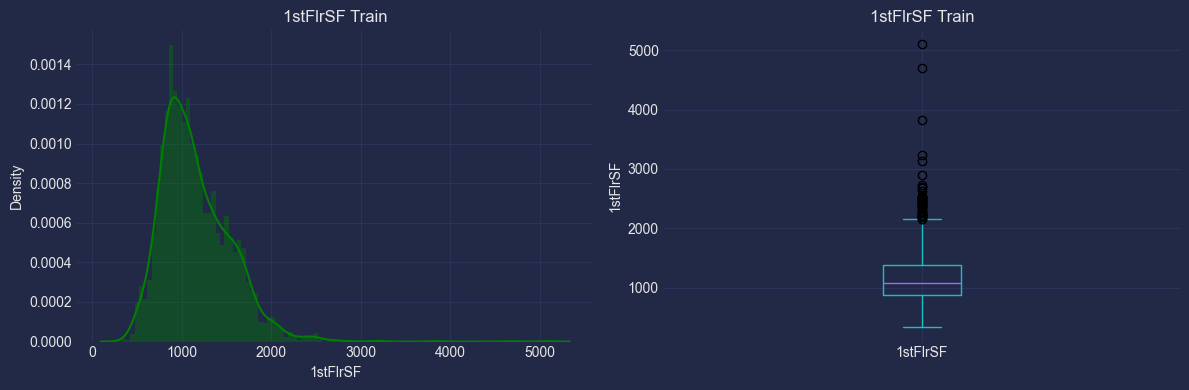

Dados de Teste:


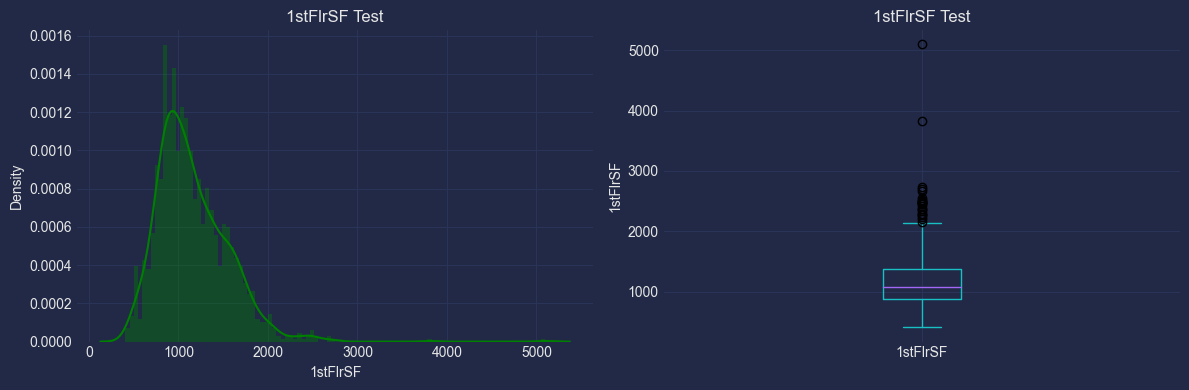

In [198]:
print('Dados de Treino:')
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(train['1stFlrSF'], color='g', bins=100, hist_kws={'alpha': 0.4}, ax=axs[0])
axs[0].set_title('1stFlrSF Train')
train['1stFlrSF'].plot(kind='box', ax=axs[1], title='1stFlrSF Train')
axs[1].set_ylabel('1stFlrSF')
plt.tight_layout()
plt.show()

print('Dados de Teste:')
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(test_kaggle['1stFlrSF'], color='g', bins=100, hist_kws={'alpha': 0.4}, ax=axs[0])
axs[0].set_title('1stFlrSF Test')
test_kaggle['1stFlrSF'].plot(kind='box', ax=axs[1], title='1stFlrSF Test')
axs[1].set_ylabel('1stFlrSF')
plt.tight_layout()
plt.show()


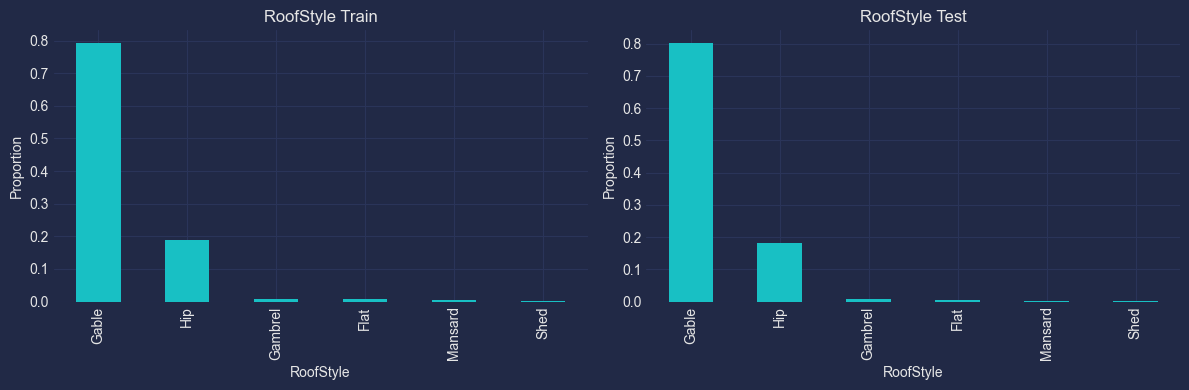

In [199]:
value_counts = train['RoofStyle'].value_counts(normalize=True)
value_counts2 = test_kaggle['RoofStyle'].value_counts(normalize=True)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
value_counts.plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('RoofStyle')
axs[0].set_ylabel('Proportion')
axs[0].set_title('RoofStyle Train')

value_counts2.plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('RoofStyle')
axs[1].set_ylabel('Proportion')
axs[1].set_title('RoofStyle Test')
plt.tight_layout()
plt.show()

### Gráficos Bivariados

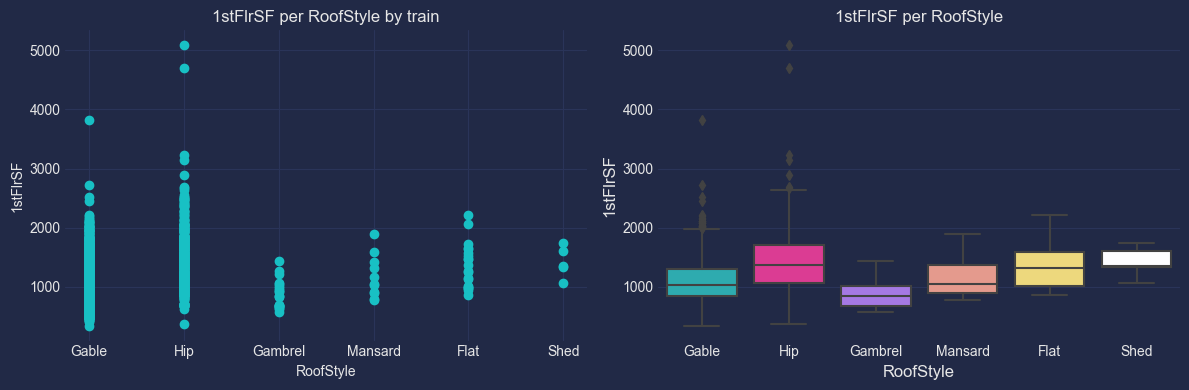

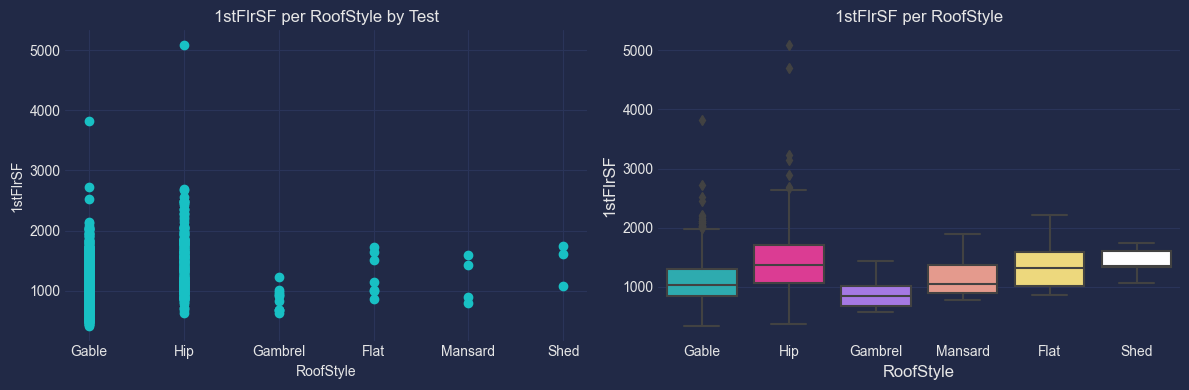

In [200]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(train['RoofStyle'], train['1stFlrSF'])
axs[0].set_title('1stFlrSF per RoofStyle by train')
axs[0].set_xlabel('RoofStyle')
axs[0].set_ylabel('1stFlrSF')
qualiQuantiVariablesAnalysis('1stFlrSF', 'RoofStyle', ax=axs[1])
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(test_kaggle['RoofStyle'], test_kaggle['1stFlrSF'])
axs[0].set_title('1stFlrSF per RoofStyle by Test')
axs[0].set_xlabel('RoofStyle')
axs[0].set_ylabel('1stFlrSF')
qualiQuantiVariablesAnalysis('1stFlrSF', 'RoofStyle', ax=axs[1])
plt.tight_layout()
plt.show()


Abaixo tabelas decrevendo a colula `1stFlrSF` nos dados de Treino e Teste

In [201]:
print('Dados de Treino: ')
display(pd.DataFrame(train['1stFlrSF'].describe()).transpose())
print('Dados de Teste: ')
pd.DataFrame(test_kaggle['1stFlrSF'].describe()).transpose()

Dados de Treino: 


,count,mean,std,min,25%,50%,75%,max
1stFlrSF,2919.0,1159.581706,392.362079,334.0,876.0,1082.0,1387.5,5095.0


Dados de Teste: 


,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1459.0,1156.534613,398.16582,407.0,873.5,1079.0,1382.5,5095.0


Na célula abaixo temos as descrições sobre a variável `1stFlrSF` em cada categoria de `RoofStyle`.

In [202]:
print('Dados de Treino: ')
display(train.groupby('RoofStyle')['1stFlrSF'].describe())
print('Dados de Teste: ')
display(test_kaggle.groupby('RoofStyle')['1stFlrSF'].describe())

Dados de Treino: 


,count,mean,std,min,25%,50%,75%,max
RoofStyle,,,,,,,,
Flat,20.0,1366.200000,376.563212,862.0,1009.00,1320.0,1592.00,2217.0
Gable,2310.0,1094.446753,334.407941,334.0,854.25,1040.0,1304.75,3820.0
Gambrel,22.0,876.045455,233.334315,576.0,675.75,841.0,1009.25,1436.0
Hip,551.0,1433.863884,488.807050,372.0,1073.50,1370.0,1710.00,5095.0
Mansard,11.0,1170.363636,355.261671,780.0,905.50,1047.0,1370.00,1898.0
Shed,5.0,1423.400000,260.407949,1073.0,1332.00,1361.0,1608.00,1743.0


Dados de Teste: 


,count,mean,std,min,25%,50%,75%,max
RoofStyle,,,,,,,,
Flat,7.0,1271.142857,347.931233,862.0,1006.0,1142.0,1580.50,1721.0
Gable,1169.0,1090.551754,342.509835,407.0,848.0,1037.0,1305.00,3820.0
Gambrel,11.0,863.363636,185.549601,628.0,679.5,914.0,964.00,1226.0
Hip,265.0,1452.811321,487.142365,624.0,1091.0,1390.0,1740.00,5095.0
Mansard,4.0,1178.750000,391.068941,797.0,873.5,1159.5,1464.75,1599.0
Shed,3.0,1474.666667,354.342113,1073.0,1340.5,1608.0,1675.50,1743.0


## 4.2. Algoritmo de construção do arquivo de submissão à plataforma Kaggle

Serão utilizados os modelos treinados para prever os dados de teste e submetê-los à plataforma Kaggle. As mesmas transformações aplicadas aos dados de treino serão aplicadas aos dados de teste por meio do `pipeline` definido na seção de pré-processamento.

In [203]:
test_submit = pd.DataFrame(fullPipeline.transform(test_kaggle), columns=fullPipeline.get_feature_names_out())
test_submit.head(5)


,quanti__MSSubClass,quanti__LotFrontage,quanti__LotArea,quanti__OverallQual,quanti__OverallCond,quanti__YearBuilt,quanti__YearRemodAdd,quanti__MasVnrArea,quanti__BsmtFinSF1,quanti__BsmtFinSF2,...,quali__SaleType_ConLw,quali__SaleType_New,quali__SaleType_Oth,quali__SaleType_WD,quali__SaleCondition_Abnorml,quali__SaleCondition_AdjLand,quali__SaleCondition_Alloca,quali__SaleCondition_Family,quali__SaleCondition_Normal,quali__SaleCondition_Partial
0,-0.873616,0.501870,0.184371,-0.772552,0.391237,-0.340510,-1.113625,-0.572250,0.058352,0.558197,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-0.873616,0.548800,0.519791,-0.063185,0.391237,-0.439565,-1.257229,0.032468,1.057354,-0.293130,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.067331,0.220295,0.464374,-0.772552,-0.507284,0.848148,0.657493,-0.572250,0.767534,-0.293130,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.067331,0.408012,-0.024109,-0.063185,0.391237,0.881166,0.657493,-0.460265,0.352564,-0.293130,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,1.478753,-1.234510,-0.654748,1.355551,-0.507284,0.683057,0.370284,-0.572250,-0.391747,-0.293130,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


Abaixo é observado um erro que o pipeline não consegue resolver, pois durante a etapa de "OneHotEncode", existem variáveis nas colunas de treinamento que não estão presentes nas colunas de teste. Para contornar essa situação, essas variáveis ausentes podem ser adicionadas aos dados de teste com o valor 0.

In [204]:
#test_submit_reg = reg_model.predict(test_submit) # executar essa linha mostrará o erro.

In [205]:
column_train = list(df.columns)
column_test = list(test_submit.columns)
column_train.remove('SalePrice')
colun_na = [item for item in column_train if item not in column_test]
test_submit[colun_na] = 0
test_submit = test_submit[column_train]

Agora, pode-se prosseguir com a modelagem dos dados. As previsões de cada modelo serão salvas, assim como a média das previsões dos quatro melhores modelos. Será necessário aplicar a função exponencial nos resultados, uma vez que, nos dados de treino, foi aplicado o logaritmo à variável `SalePrice`.

In [221]:
def saveKaggleSubmissionFile(models, all=False):
    index = 0
    fourBestModelsCombined = np.exp((models[tableModels['Model'].iloc[0]].predict(test_submit) +
                                     models[tableModels['Model'].iloc[1]].predict(test_submit) +
                                     models[tableModels['Model'].iloc[2]].predict(test_submit) +
                                     models[tableModels['Model'].iloc[3]].predict(test_submit)) / 4)
    reg_submission = pd.DataFrame({'Id': test_kaggle['Id'], 'SalePrice': np.round(fourBestModelsCombined).astype(int)})
    filePath = 'FourBestModelsCombined_submission.csv'
    reg_submission.to_csv(filePath, index=False)
    if all:
        for name, model in models.items():
            if name == 'ANN' or name == 'Logistic Regression':
                y_pred = model.predict(test_submit)
            else:
                y_pred = np.exp(model.predict(test_submit))
            y_pred = np.round(y_pred).astype(int)
            reg_submission = pd.DataFrame({'Id': test_kaggle['Id'], 'SalePrice': y_pred})
            filePath = name + '_' + '_submission.csv'
            index += 1
            reg_submission.to_csv(filePath, index=False)


In [223]:
saveKaggleSubmissionFile(model_dict)

## 4.3 - Desempenho Kaggle

Os resultados mencionados podem ser replicados executando os códigos descritos anteriormente. O melhor score no Kaggle foi alcançado ao combinar os quatro melhores modelos, e atualmente essa pontuação corresponderia aproximadamente à posição 900 no ranking. Outros scores melhores podem ser obtidos utilizando o datasets externos, mas este notebook utiliza apenas os dados oficiais da competição para previsão e modelagem. Um desses datasets pode ser encontrado no link [danttis/house-prices-advanced-regression-techniques](https://www.kaggle.com/datasets/danttis/house-prices-advanced-regression-techniques).

<div align="center"> <img src="https://uploaddeimagens.com.br/images/004/508/787/original/Anota%C3%A7%C3%A3o_2023-06-15_212730.png">
<img src="https://uploaddeimagens.com.br/images/004/508/817/original/Anota%C3%A7%C3%A3o_2023-06-15_213657.png?1686876162" style="width: 67%;">
</div>